In [264]:
import pandas as pd
import numpy as np
import warnings
import datetime as dt
import os
warnings.filterwarnings('ignore')


<h1>1. Read data</h1>

In [266]:
dir = os.getcwd()
csv_path = os.path.join(dir, 'sales_transaction.csv')

df = pd.read_csv(csv_path)

In [267]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [232]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


<h1>2. Clean data</h1>

In [269]:
def clean_data(df):
    num_rows_init = df.shape[0]
    
    # check for duplicates
    duplicates = df.duplicated()
    print('------ Duplicated values summary ------')
    if duplicates.any():
        df = df.drop_duplicates()
        num_duplicates_dropped = num_rows_init - df.shape[0]
        print(f'{num_duplicates_dropped} duplicated rows have been dropped. \n')
    else:
        print('No duplicated rows found.')

    # check for missing/null values, remove if > 10%
    missing_values = df.isnull().sum()
    print('------ Null values summary ------')
    for column, count in missing_values.items():
        missing_ratio = count / num_rows_init
        if count > 0:
            print(f'Column: {column}, Missing values: {count}, Ratio: {missing_ratio:.2%}')

    if missing_values.sum() > 0:
        missing_ratio_total = missing_values.sum() / num_rows_init
        if missing_ratio_total <= 0.1:
            df = df.dropna()
            num_missing_rows_dropped = num_rows_init - df.shape[0]
            print(f'{num_missing_rows_dropped} rows with missing/null values have been dropped. \n')

    if missing_values.sum() == 0:
        print("No missing/null values were found.")

    print('------ Changes summary ------')
    print(f'{df.shape[0]} rows ({df.shape[0]/num_rows_init:.2%}) remained. \n')
    
    # convert column(s) datatype
    df['Date'] = pd.to_datetime(df['Date'],format = '%m/%d/%Y')

    return df

cleaned_df = clean_data(df)

------ Duplicated values summary ------
5200 duplicated rows have been dropped. 

------ Null values summary ------
Column: CustomerNo, Missing values: 55, Ratio: 0.01%
5255 rows with missing/null values have been dropped. 

------ Changes summary ------
531095 rows (99.02%) remained. 



In [234]:
cleaned_df.head(10)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
5,581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,13069.0,United Kingdom
6,581475,2019-12-09,22118,Joy Wooden Block Letters,11.53,18,13069.0,United Kingdom
7,581475,2019-12-09,22119,Peace Wooden Block Letters,12.25,12,13069.0,United Kingdom
8,581475,2019-12-09,22217,T-Light Holder Hanging Lace,10.65,12,13069.0,United Kingdom
9,581475,2019-12-09,22216,T-Light Holder White Lace,10.55,24,13069.0,United Kingdom


In [235]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  float64       
 7   Country        531095 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [236]:
cleaned_df['PurchaseAmount'] = cleaned_df['Price'] * cleaned_df['Quantity']
cleaned_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,PurchaseAmount
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64


<h1>3. Create the RFM Table</h1>

In [237]:
start_date = cleaned_df['Date'].min()
end_date = cleaned_df['Date'].max()
print(f'Start date is: {start_date} \nEnd date is: {end_date} \nTime range is: {end_date-start_date}')

Start date is: 2018-12-01 00:00:00 
End date is: 2019-12-09 00:00:00 
Time range is: 373 days 00:00:00


<p>Set end_date as current time</p>

In [238]:
cur_time = end_date

In [239]:
rfmTable = cleaned_df.groupby('CustomerNo').agg({'Date': lambda x: (cur_time - x.max()).days,
                                                 'TransactionNo': lambda x: len(x),
                                                 'PurchaseAmount': lambda x: x.sum()}) 

rfmTable['Date'] = rfmTable['Date'].fillna(0).astype(int)
rfmTable.rename(columns={'Date': 'recency', 
                         'TransactionNo': 'frequency', 
                         'PurchaseAmount': 'monetary_value'}, inplace=True)

In [240]:
rfmTable.head(20)

,recency,frequency,monetary_value
CustomerNo,,,
12004.0,227,56,1509.60
12006.0,218,1,24.76
12008.0,276,203,5689.57
12013.0,359,1,69.96
12024.0,176,5,149.52
12025.0,287,46,1021.59
12026.0,339,409,20486.32
12031.0,70,7,136.18
12042.0,264,223,6296.77


<h1>4. Validating the RFM table</h1>

In [248]:
cus_12024 = rfmTable.query('CustomerNo == 12024')
print(cus_12024)

print(f'\nTransaction data is: \n{cleaned_df.query("CustomerNo == 12024")}')

            recency  frequency  monetary_value
CustomerNo                                    
12024.0         176          5          149.52

Transaction data is: 
       TransactionNo       Date ProductNo                ProductName  Price  \
309301        557024 2019-06-16     22052  Vintage Caravan Gift Wrap  10.68   
309302        557024 2019-06-16     22705           Wrap Green Pears  10.68   
309303        557024 2019-06-16     22707           Wrap Monster Fun  10.68   
309304        557024 2019-06-16     22704            Wrap Red Apples  10.68   
309305        557024 2019-06-16     22706               Wrap Cowboys  10.68   

        Quantity  CustomerNo         Country  PurchaseAmount  
309301         4     12024.0  United Kingdom           42.72  
309302         1     12024.0  United Kingdom           10.68  
309303         3     12024.0  United Kingdom           32.04  
309304         3     12024.0  United Kingdom           32.04  
309305         3     12024.0  United Kingdom  

In [249]:
(cur_time - dt.datetime(2019,6,16)).days==176

True

<h1>5. Determining RFM Quartiles</h1>

In [253]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,17.0,19.0,1773.2700
0.50,52.0,51.0,4654.1850
0.75,155.0,130.0,11661.5225


In [254]:
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 17.0, 0.5: 52.0, 0.75: 155.0},
 'frequency': {0.25: 19.0, 0.5: 51.0, 0.75: 130.0},
 'monetary_value': {0.25: 1773.27, 0.5: 4654.185, 0.75: 11661.522500000001}}

<h1>6. Creating the RFM segmentation table</h1>

In [255]:
rfmSegmentation = rfmTable

<p>Being high recency is bad, while high frequency and monetary value is good.</p>

In [256]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [257]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [258]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [259]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerNo,,,,,,,
12004.0,227,56,1509.60,4,2,4,424
12006.0,218,1,24.76,4,4,4,444
12008.0,276,203,5689.57,4,1,2,412
12013.0,359,1,69.96,4,4,4,444
12024.0,176,5,149.52,4,4,4,444


In [ ]:
# rfmSegmentation.to_csv('rfm-table.csv', sep=',')

<p>Who are the top 5 best customers? by RFM Class (111), high spenders who buy recently and frequently?</p>

In [263]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerNo,,,,,,,
14646.0,1,2066,2108959.95,1,1,1,111
18102.0,0,431,897137.36,1,1,1,111
17450.0,8,339,876447.01,1,1,1,111
14911.0,1,5794,872608.57,1,1,1,111
14156.0,9,1399,683106.77,1,1,1,111


<h1>7. Plotting histograms of RFM Values</h1>

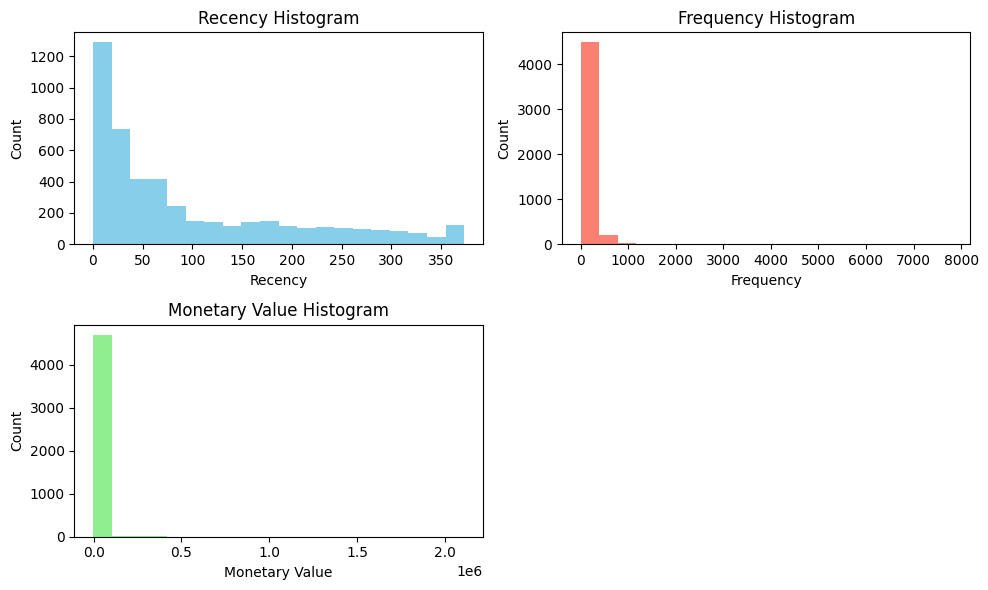

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(rfmSegmentation['recency'], bins=20, color='skyblue')
plt.title('Recency Histogram')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(rfmSegmentation['frequency'], bins=20, color='salmon')
plt.title('Frequency Histogram')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
plt.hist(rfmSegmentation['monetary_value'], bins=20, color='lightgreen')
plt.title('Monetary Value Histogram')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


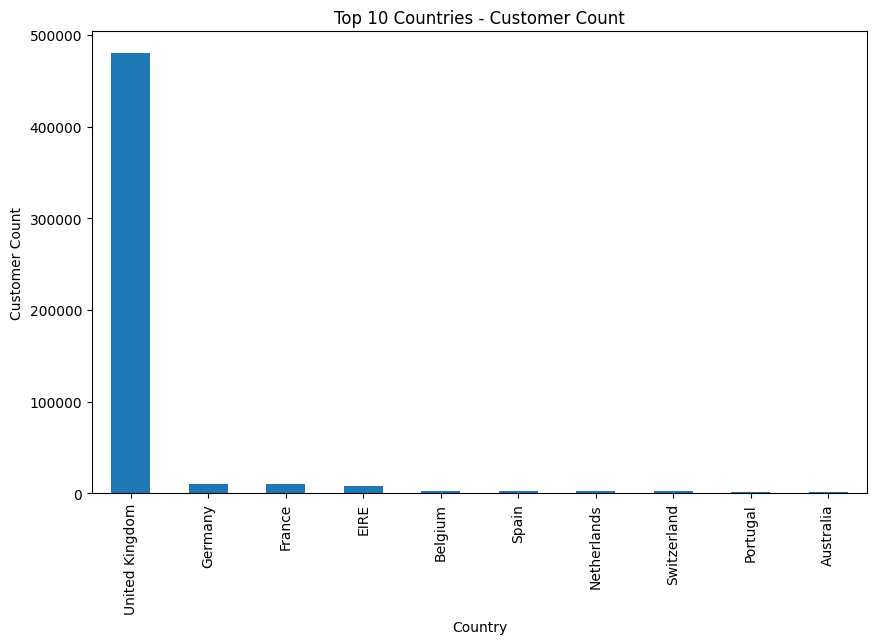

In [284]:
# Plotting bar plot of Country-wise customer count
plt.figure(figsize=(10, 6))
country_counts = cleaned_df['Country'].value_counts().head(10)
country_counts.plot(kind='bar')
plt.title('Top 10 Countries - Customer Count')
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.show()

In [283]:
cleaned_df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


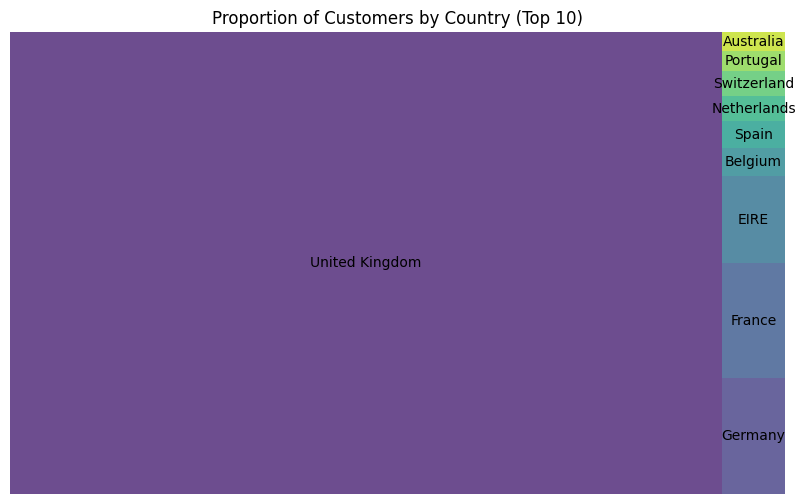

In [286]:
import squarify

# Calculate country-wise proportion of customers
country_proportions = cleaned_df['Country'].value_counts(normalize=True).head(10)

# Generate labels and sizes for the treemap
labels = country_proportions.index
sizes = country_proportions.values

# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette('viridis', len(labels)))
plt.title('Proportion of Customers by Country (Top 10)')
plt.axis('off')
plt.show()
